### Exercise 3 - Advanced text processing, collocations and vector spaces

In [41]:
import requests
from bs4 import BeautifulSoup
import re
import nltk
import numpy as np
import scipy

In [42]:
#%% Get the text content of the page
def getpagetext(parsedpage):
    # Remove HTML elements that are scripts
    scriptelements=parsedpage.find_all('script')
    # Concatenate the text content from all table cells
    for scriptelement in scriptelements:
        # Extract this script element from the page.
        # This changes the page given to this function!
        scriptelement.extract()
    pagetext=parsedpage.get_text()
    return(pagetext)

In [43]:
def ebook_downloader(ebook_url):
    ebook_page = requests.get(ebook_url)
    parsed_page = BeautifulSoup(ebook_page.content, 'html.parser')
    # get text from the ebook
    ebook_text = getpagetext(parsed_page)
    start_text = '*** START OF THIS PROJECT GUTENBERG EBOOK THE CALL OF THE WILD ***'
    start_index = ebook_text.find(start_text)
    end_index = ebook_text.find('*** END OF THE PROJECT GUTENBERG EBOOK')
    ebook_text = ebook_text[start_index + len(start_text):end_index]
    # remove leading and trailing whitespaces
    ebook_text = ebook_text.strip()
    ebook_text = ' '.join(ebook_text.split())
    return(ebook_text)

#### Exercise 3.1

In [12]:
ebook_text = ebook_downloader('https://www.gutenberg.org/files/1342/1342-0.txt')

In [13]:
ebook_text

'THERE IS AN ILLUSTRATED EDITION OF THIS TITLE WHICH MAY VIEWED AT EBOOK [# 42671 ] cover Pride and Prejudice By Jane Austen CONTENTS Chapter 1 Chapter 2 Chapter 3 Chapter 4 Chapter 5 Chapter 6 Chapter 7 Chapter 8 Chapter 9 Chapter 10 Chapter 11 Chapter 12 Chapter 13 Chapter 14 Chapter 15 Chapter 16 Chapter 17 Chapter 18 Chapter 19 Chapter 20 Chapter 21 Chapter 22 Chapter 23 Chapter 24 Chapter 25 Chapter 26 Chapter 27 Chapter 28 Chapter 29 Chapter 30 Chapter 31 Chapter 32 Chapter 33 Chapter 34 Chapter 35 Chapter 36 Chapter 37 Chapter 38 Chapter 39 Chapter 40 Chapter 41 Chapter 42 Chapter 43 Chapter 44 Chapter 45 Chapter 46 Chapter 47 Chapter 48 Chapter 49 Chapter 50 Chapter 51 Chapter 52 Chapter 53 Chapter 54 Chapter 55 Chapter 56 Chapter 57 Chapter 58 Chapter 59 Chapter 60 Chapter 61 Chapter 1 It is a truth universally acknowledged, that a single man in possession of a good fortune, must be in want of a wife. However little known the feelings or views of such a man may be on his first

In [11]:
# Tokenize downloaded texts and change them to NLTK format
tokenized_text = nltk.word_tokenize(ebook_text)
nltk_texts = nltk.Text(tokenized_text)

In [16]:
nltk_texts[4576]

'women'

In [23]:
# Make all downloaded texts lowercase
lowercase_texts = []
for l in range(len(nltk_texts)):
    lowercase_word = nltk_texts[l].lower()
    lowercase_texts.append(lowercase_word)

In [132]:
type(lowercase_texts[0:10])

list

In [50]:
# Convert a POS tag for WordNet
def tagtowordnet(postag):
    wordnettag=-1
    if postag[0]=='N':
        wordnettag='n'
    elif postag[0]=='V':
        wordnettag='v'
    elif postag[0]=='J':
        wordnettag='a'
    elif postag[0]=='R':
        wordnettag='r'
    return(wordnettag)

In [51]:
# POS tag and lemmatize the loaded texts
# Download tagger and wordnet resources if you do not have them already
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# lemmatize downloaded texts
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatizetext(nltktexttolemmatize):
    # tag the text with POS tags
    taggedtext = nltk.pos_tag(nltktexttolemmatize)
    # lemmatize each word text
    lemmatizedtext = []
    for l in range(len(taggedtext)):
        # Lemmatize a word using the WordNet converted POS tag
        wordtolemmatize = taggedtext[l][0]
        wordnettag = tagtowordnet(taggedtext[l][1])
        if wordnettag != -1:
            lemmatizedword = lemmatizer.lemmatize(wordtolemmatize, wordnettag)
        else:
            lemmatizedword = wordtolemmatize
        # store the lemmatized word
        lemmatizedtext.append(lemmatizedword)
    return(lemmatizedtext)



[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\tunde\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tunde\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [31]:
# lemmatize downloaded texts
lemmatized_texts = lemmatizetext(lowercase_texts)
lemmatized_texts = nltk.Text(lemmatized_texts)

In [134]:
type(lemmatized_texts)

nltk.text.Text

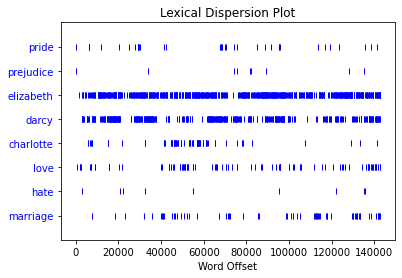

In [39]:
# lexical dispersion plots
lemmatized_texts.dispersion_plot(['pride', 'prejudice', 'elizabeth', 'darcy', 'charlotte', 'love', 'hate', 'marriage'])

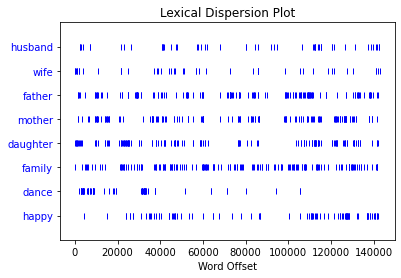

In [40]:
lemmatized_texts.dispersion_plot(['husband', 'wife', 'father', 'mother', 'daughter', 'family', 'dance', 'happy'])

Yes, the dispersion plots suggest something about the focus of the text in different parts of the book. 
* ***elizabeth*** appears to have the highest number of occurrences and it's well distributed throughout the length of the book. This suggests that ***elizabeth*** is the center character of the book.
* ***darcy*** appears to have the 2nd highest number of occurrences and it's fairly distributed throughout the book. It appears to be an important character in the book.
* Generally, the book appears to be centered around marriage, family and love.

#### Exercise 3.2

In [42]:
ebook_text = ebook_downloader('https://www.gutenberg.org/files/84/84-0.txt')

In [43]:
ebook_text

'Frankenstein; or, the Modern Prometheus by Mary Wollstonecraft (Godwin) Shelley CONTENTS Letter 1 Letter 2 Letter 3 Letter 4 Chapter 1 Chapter 2 Chapter 3 Chapter 4 Chapter 5 Chapter 6 Chapter 7 Chapter 8 Chapter 9 Chapter 10 Chapter 11 Chapter 12 Chapter 13 Chapter 14 Chapter 15 Chapter 16 Chapter 17 Chapter 18 Chapter 19 Chapter 20 Chapter 21 Chapter 22 Chapter 23 Chapter 24 Letter 1 _To Mrs. Saville, England._ St. Petersburgh, Dec. 11th, 17—. You will rejoice to hear that no disaster has accompanied the commencement of an enterprise which you have regarded with such evil forebodings. I arrived here yesterday, and my first task is to assure my dear sister of my welfare and increasing confidence in the success of my undertaking. I am already far north of London, and as I walk in the streets of Petersburgh, I feel a cold northern breeze play upon my cheeks, which braces my nerves and fills me with delight. Do you understand this feeling? This breeze, which has travelled from the regio

In [44]:
# Tokenize downloaded texts and change them to NLTK format
tokenized_text = nltk.word_tokenize(ebook_text)
nltk_texts = nltk.Text(tokenized_text)

In [45]:
nltk_texts[0:5]

['Frankenstein', ';', 'or', ',', 'the']

In [46]:
# Make all downloaded texts lowercase
lowercase_texts = []
for l in range(len(nltk_texts)):
    lowercase_word = nltk_texts[l].lower()
    lowercase_texts.append(lowercase_word)

In [48]:
lowercase_texts[0:5]

['frankenstein', ';', 'or', ',', 'the']

In [49]:
# lemmatize downloaded texts
lemmatized_texts = lemmatizetext(lowercase_texts)
lemmatized_texts = nltk.Text(lemmatized_texts)

In [51]:
lemmatized_texts

<Text: frankenstein ; or , the modern prometheus by...>

In [61]:
# concordance view
lemmatized_texts.concordance('science', lines=70)

Displaying 29 of 29 matches:
cine , and those branch of physical science from which a naval adventurer might
ch lead to my predilection for that science . when i be thirteen year of age we
explode and that a modern system of science have be introduce which possess muc
in the great disdain for a would-be science which could never even step within 
e branch of study appertain to that science as be build upon secure foundation 
t deeply imbue in the secret of his science . he ask me several question concer
progress in the different branch of science appertain to natural philosophy . i
 by the modern professor of natural science . with a confusion of idea only to 
ry different when the master of the science seek immortality and power ; such v
hose vision on which my interest in science be chiefly found . i be require to 
ry view of the present state of the science and explain many of its elementary 
get : “ the ancient teacher of this science , ” say he , “ promise impossibilit
ent study a

In [60]:
lemmatized_texts.concordance('horror', lines=70)

Displaying 49 of 49 matches:
uld be impress with no supernatural horror . i do not ever remember to have tr
ing-places . who shall conceive the horror of my secret toil as i dabble among
f the dream vanish , and breathless horror and disgust fill my heart . unable 
lannel . i start from my sleep with horror ; a cold dew cover my forehead , my
 . oh ! no mortal could support the horror of that countenance . a mummy again
extreme weakness . mingle with this horror , i felt the bitterness of disappoi
is hand , and in a moment forgot my horror and misfortune ; i felt suddenly , 
will and power to effect purpose of horror , such as the deed which he have no
 to announce publicly ; its astound horror would be look upon as madness by th
 could make the murder memorable in horror . justine also be a girl of merit a
 place round his neck , a murmur of horror and indignation fill the court . ju
countenance have alter . surprise , horror , and misery be strongly express . 
 ignominy ? i could not

In [59]:
lemmatized_texts.concordance('monster', lines=70)

Displaying 32 of 32 matches:
, i behold the wretch—the miserable monster whom i have create . he hold up the
walk about . i dread to behold this monster , but i fear still more that henry 
me ! save me ! ” i imagine that the monster seize me ; i struggle furiously and
estore me to life . the form of the monster on whom i have bestow existence be 
almost begin to think that i be the monster that he say i be . he threaten exco
, and i live in daily fear lest the monster whom i have create should perpetrat
come home , and men appear to me as monster thirst for each other ’ s blood . y
d of your remain friends. ” “ abhor monster ! fiend that thou art ! the torture
y convince that i be in reality the monster that i be , i be fill with the bitt
d of none like me . be i , then , a monster , a blot upon the earth , from whic
accurse creator ! why do you form a monster so hideous that even _you_ turn fro
lently . ‘ let me go , ’ he cry ; ‘ monster ! ugly wretch ! you wish to eat me 
ou must com

In [58]:
lemmatized_texts.concordance('fear', lines=70)

Displaying 66 of 66 matches:
nd they be sufficient to conquer all fear of danger or death and to induce me 
however , lay to until the morning , fear to encounter in the dark those large
re he be able to speak , and i often fear that his suffering have deprive him 
ong the tame scene of nature i might fear to encounter your unbelief , perhaps
at a tale of superstition or to have fear the apparition of a spirit . darknes
ion , listen attentively , catch and fear each sound as if it be to announce t
if i seek to avoid the wretch whom i fear every turning of the street would pr
y heart palpitate in the sickness of fear , and i hurry on with irregular step
ho , on a lonely road , doth walk in fear and dread , and , have once turn rou
dread to behold this monster , but i fear still more that henry should see him
limb the hill or row on the lake . i fear that he will become an idle unless w
ent to my recollection , but which i fear the detail to another would only imp
y , might not be the le

* The results show that ***fear*** and ***horror*** are the two most common words with 66 and 49 occurrences respectively.
* ***fear*** is mostly preceded by the first person pronoun ***i***, that is, it appears mostly in context with ***i***.
* ***monster*** is mostly preceded by the definite article ***the***, that is, it appears mostly in context with ***the***.
* The words ***of*** and ***the*** mostly precede ***science***, that is, it appears mostly in context with ***of*** and ***the***.

#### Exercise 3.3

In [52]:
ebook_text = ebook_downloader('https://www.gutenberg.org/files/215/215-0.txt')

In [53]:
ebook_text

'Produced by Ryan, Kirstin, Linda and Rick Trapp, and David Widger cover The Call of the Wild by Jack London Contents Chapter I. Into the Primitive Chapter II. The Law of Club and Fang Chapter III. The Dominant Primordial Beast Chapter IV. Who Has Won to Mastership Chapter V. The Toil of Trace Chapter VI. For the Love of a Man Chapter VII. The Sounding of the Call Chapter I. Into the Primitive “Old longings nomadic leap, Chafing at custom’s chain; Again from its brumal sleep Wakens the ferine strain.” Buck did not read the newspapers, or he would have known that trouble was brewing, not alone for himself, but for every tide-water dog, strong of muscle and with warm, long hair, from Puget Sound to San Diego. Because men, groping in the Arctic darkness, had found a yellow metal, and because steamship and transportation companies were booming the find, thousands of men were rushing into the Northland. These men wanted dogs, and the dogs they wanted were heavy dogs, with strong muscles by 

In [54]:
# Tokenize downloaded texts and change them to NLTK format
tokenized_text = nltk.word_tokenize(ebook_text)
nltk_texts = nltk.Text(tokenized_text)

# Make all downloaded texts lowercase
lowercase_texts = []
for l in range(len(nltk_texts)):
    lowercase_word = nltk_texts[l].lower()
    lowercase_texts.append(lowercase_word)
# lemmatize downloaded texts
lemmatized_texts = lemmatizetext(lowercase_texts)
lemmatized_texts = nltk.Text(lemmatized_texts)

In [55]:
# get unique words, where they occur and counts of occurrence
unique_results = np.unique(lemmatized_texts, return_inverse = True, return_counts = True)
myvocabulary = unique_results[0]
myindices_in_vocabulary = unique_results[1]
myvocabulary_occurrence_counts = unique_results[2]
highest_occurrences_indices = np.argsort(-1 * myvocabulary_occurrence_counts, axis=0)

In [56]:
highest_occurrences_indices

array([  13, 3728,   16, ..., 1975, 2228, 2220], dtype=int64)

In [57]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tunde\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [58]:
#%% Vocabulary pruning
nltkstopwords = nltk.corpus.stopwords.words('english')
pruningdecisions = np.zeros((len(myvocabulary),1))
for k in range(len(myvocabulary)):
    # Rule 1: check the nltk stop word list
    if (myvocabulary[k] in nltkstopwords):
        pruningdecisions[k] = 1
    # Rule 2: if the word is too short
    if (len(myvocabulary[k]) < 2):
        pruningdecisions[k] = 1
      # Rule 3: if the word is too long
    if (len(myvocabulary[k]) > 20):
        pruningdecisions[k] = 1
    # Rule 4: if the word is in the top 0.5% of frequent words
    if (k in highest_occurrences_indices[0:int(np.floor(len(myvocabulary)*0.0005))]):
        pruningdecisions[k] = 1
    # Rule 5: if the word occurs less than 4 times
    if(myvocabulary_occurrence_counts[k] < 4):
        pruningdecisions[k] = 1

In [59]:
print('Top-100 words after pruning the unified vocabulary:\n')
remaining_indices = np.squeeze(np.where(pruningdecisions==0)[0])
remaining_vocabulary = myvocabulary[remaining_indices]
remainingvocabulary_occurrencecounts = myvocabulary_occurrence_counts[remaining_indices]
remaining_highest_occurrences_indices = np.argsort(-1*remainingvocabulary_occurrencecounts)
print(remaining_vocabulary[remaining_highest_occurrences_indices[0:200]])
print(remainingvocabulary_occurrencecounts[remaining_highest_occurrences_indices[0:200]])

Top-100 words after pruning the unified vocabulary:

['buck' 'dog' 'day' 'one' 'work' 'come' 'thornton' 'go' 'man' 'make'
 'time' 'back' 'project' 'could' 'upon' 'men' 'would' 'life' 'spitz'
 'sled' 'know' 'françois' 'great' 'head' 'thing' 'gutenberg-tm' 'never'
 'like' 'long' 'foot' 'camp' 'two' 'get' 'though' 'night' 'take' 'way'
 'run' 'eye' 'last' 'club' 'away' 'break' 'trail' 'hand' 'saw' 'call'
 'john' 'hundred' 'till' 'perrault' 'half' 'three' 'side' 'hal' 'find'
 'say' 'first' 'face' 'trace' 'place' 'snow' 'wild' 'wolf' 'every' 'see'
 'fire' 'stand' 'end' 'old' 'cry' 'team' 'many' 'spring' 'leave' 'turn'
 'sol-leks' 'husky' 'body' 'teeth' 'another' 'seem' 'give' 'state' 'sound'
 'keep' 'ice' 'behind' 'gutenberg' 'water' 'start' 'rest' 'law' 'leap'
 'electronic' 'hold' 'lay' 'around' 'mile' 'even' 'forth' 'good' 'become'
 'fell' 'foundation' 'drive' 'travel' 'hour' 'look' 'love' 'forest'
 'without' 'dave' 'grow' 'copy' 'fight' 'follow' 'eat' 'shoulder' 'fall'
 'pack' 'nothing' '

In [60]:
#%% Get indices of documents to remaining words
oldtopruned = []
tempind = -1
for k in range(len(myvocabulary)):
    if pruningdecisions[k] == 0:
        tempind = tempind + 1
        oldtopruned.append(tempind)
    else:
        oldtopruned.append(-1)


In [61]:
#%% Create pruned texts
mypruned_texts = []
myindices_in_prunedvocabulary = []
for l in range(len(lemmatized_texts)):
    temp_oldindex = myindices_in_vocabulary[l]
    temp_newindex = oldtopruned[temp_oldindex]
    #print(temp_newindex)
    #print(temp_oldindex)
    if temp_newindex != -1:
        myindices_in_prunedvocabulary.append(temp_newindex)
        mypruned_texts.append(myvocabulary[temp_oldindex])

In [62]:
#%% Compute statistics of word distances
# Compute counts and sums of distances and squared distances
distanceoccurrences = scipy.sparse.lil_matrix((len(remaining_vocabulary), len(remaining_vocabulary)))
sumdistances = scipy.sparse.lil_matrix((len(remaining_vocabulary), len(remaining_vocabulary)))
sumabsdistances = scipy.sparse.lil_matrix((len(remaining_vocabulary), len(remaining_vocabulary)))
sumdistancesquares = scipy.sparse.lil_matrix((len(remaining_vocabulary), len(remaining_vocabulary)))

In [63]:
# Loop through all word positions m
latestoccurrencepositions = scipy.sparse.lil_matrix((len(remaining_vocabulary), len(remaining_vocabulary)))
for m in range(len(mypruned_texts)):
    # Get the vocabulary index of the current word in position m
    currentword = myindices_in_prunedvocabulary[m]
    # Loop through previous words, counting back up to 10 words from current word
    windowsize = min(m, 10)
    for n in range(windowsize):
        # Get the vocabulary index of the previous word in position m-n-1
        previousword = myindices_in_prunedvocabulary[m-n-1]
        # Is this the fist time we have encountered this word while
        # counting back from the word at m? Then it is the closest pair
        if latestoccurrencepositions[currentword,previousword] < m:
            # Store the occurrence of this word pair with the word at m as the 1st word
            distanceoccurrences[currentword,previousword] = distanceoccurrences[currentword,previousword] + 1
            
            sumdistances[currentword,previousword] = sumdistances[currentword,previousword]+((m-n-1)-m)
            
            sumabsdistances[currentword,previousword] = sumabsdistances[currentword,previousword]+abs((m-n-1)-m)
            
            sumdistancesquares[currentword,previousword] = sumdistancesquares[currentword,previousword]+((m-n-1)-m)**2
            
            # Store the occurrence of this word pair with the word at n as the 1st word
            distanceoccurrences[previousword,currentword] = distanceoccurrences[previousword,currentword]+1
            
            sumdistances[previousword,currentword] = sumdistances[previousword,currentword]+(m-(m-n-1))
            
            sumabsdistances[previousword,currentword] = sumabsdistances[previousword,currentword]+abs(m-(m-n-1))
            
            sumdistancesquares[previousword,currentword] = sumdistancesquares[previousword,currentword]+(m-(m-n-1))**2
            # Mark that we found this pair while counting down from m,
            # so we do not count more distant occurrences of the pair
            latestoccurrencepositions[currentword,previousword] = m
            latestoccurrencepositions[previousword,currentword] = m



In [64]:
# Faster version
# Compute distribution statistics based on the counts
n_vocab=len(remaining_vocabulary)
distancemeans=scipy.sparse.lil_matrix((n_vocab,n_vocab))
absdistancemeans=scipy.sparse.lil_matrix((n_vocab,n_vocab))
distancevariances=scipy.sparse.lil_matrix((n_vocab,n_vocab))
absdistancevariances=scipy.sparse.lil_matrix((n_vocab,n_vocab))

for m in range(n_vocab):
    # Find the column indices that have at least two occurrences
    tempindices=np.nonzero(distanceoccurrences[m,:]>1)[1]
    # The occurrence vector needs to be a non-sparse data type
    tempoccurrences=distanceoccurrences[m,tempindices].todense()
    
    # Estimate mean of m-n distance
    distancemeans[m,tempindices]=np.squeeze(np.array(sumdistances[m, tempindices]/tempoccurrences))
    
    absdistancemeans[m,tempindices]=np.squeeze(np.array(sumabsdistances[m,tempindices]/tempoccurrences))
    
    # Estimate variance of m-n distance
    meanterm=distancemeans[m,tempindices].todense()
    meanterm=np.multiply(meanterm,meanterm)
    meanterm=np.multiply(tempoccurrences/(tempoccurrences-1),meanterm)
    
    distancevariances[m,tempindices]=np.squeeze(np.array(sumdistancesquares[m,tempindices]/(tempoccurrences-1)- meanterm))
    
    meanterm=absdistancemeans[m,tempindices].todense()
    meanterm=np.multiply(meanterm,meanterm)
    meanterm=np.multiply(tempoccurrences/(tempoccurrences-1),meanterm)
    
    absdistancevariances[m,tempindices]=np.squeeze(np.array(
        sumdistancesquares[m,tempindices]/(tempoccurrences-1) - meanterm))
    

In [65]:
# Compute overall distance distribution
overalldistancecount = np.sum(distanceoccurrences)
overalldistancesum = np.sum(sumdistances)
overallabsdistancesum = np.sum(sumabsdistances)
overalldistancesquaresum = np.sum(sumdistancesquares)

overalldistancemean=overalldistancesum/overalldistancecount

overallabsdistancemean=overallabsdistancesum/overalldistancecount

overalldistancevariance = overalldistancesquaresum/(overalldistancecount-1)-overalldistancecount/(
    overalldistancecount-1)*overalldistancemean

overallabsdistancevariance = overalldistancesquaresum/(overalldistancecount-1)-overalldistancecount/(
    overalldistancecount-1)*overallabsdistancemean


In [66]:
# find the index of a word
def findwordindex(wordstring):
    for k in range(len(remaining_vocabulary)):
        if remaining_vocabulary[k]==wordstring:
            return(k)
    return(-1)

In [67]:
# Filter the collocation---noun noun collacations
def filter_collocation(text1, text2):
    acceptable_types = ('NN', 'NNS', 'NNP', 'NNPS')
    #second_type = ('NN', 'NNS', 'NNP', 'NNPS')
    collocation = nltk.word_tokenize(text1 + ' ' + text2)
    tags = nltk.pos_tag(collocation)
    if (tags[0][1] in acceptable_types) & (tags[1][1] in acceptable_types):
        #print(tags)
        return True
    else:
        return False

In [68]:
#%% Compute t-test p-values comparing abs distance distributions
absdistancepvalues = scipy.sparse.lil_matrix((n_vocab,n_vocab))

for m in range(n_vocab):
    # Find pairs of word m
    tempindices=np.nonzero(distanceoccurrences[m,:]>1)[1]
    # For computation we need to transform these to non-sparse vectors
    meanterm=absdistancemeans[m,tempindices].todense()
    varianceterm=absdistancevariances[m,tempindices].todense()
    occurrenceterm=distanceoccurrences[m,tempindices].todense()
    
    # Compute the t-test statistic for each pair
    tempstatistic=(meanterm - overallabsdistancemean)/np.sqrt(varianceterm/occurrenceterm + 
                                                              overallabsdistancevariance/overalldistancecount)
    
    # Compute the t-test degrees of freedom for each pair
    tempdf=(np.power(varianceterm/occurrenceterm+overallabsdistancevariance/overalldistancecount,2))/((
        np.power(varianceterm/occurrenceterm,2))/(occurrenceterm-1)+((
        overallabsdistancevariance/overalldistancecount)**2)/(overalldistancecount-1))
    
    # Compute the t-test p-value for each pair
    temppvalue=scipy.stats.t.cdf(tempstatistic,tempdf)
    # Store the t-test p-value for each pair
    absdistancepvalues[m,tempindices]=np.squeeze(np.array(temppvalue))



In [69]:
def printtopcollocations(wordstring):
    # Find the chosen word and words that occurred with it at least 2 times
    mywordindex=findwordindex(wordstring)
    if mywordindex==-1:
        print('Word not found: '+ wordstring)
        return
    # Require at least 10 pair occurrences
    minpairoccurrences=10
    tempindices=np.nonzero(distanceoccurrences[mywordindex,:]>minpairoccurrences)[1]
    
    # Sort the pairs by lowest pvalue
    lowest_meandistances_indices=np.argsort(np.squeeze(np.array(
        absdistancepvalues[mywordindex,tempindices].todense())),axis=0)
    # Print the top-50 lowest-distance pairs
    print('\nLowest p-values\n')
    
    for k in range(min(50, len(lowest_meandistances_indices))):
        otherwordindex=tempindices[lowest_meandistances_indices[k]]
        
        filter_result = filter_collocation(remaining_vocabulary[mywordindex],remaining_vocabulary[otherwordindex])
        if filter_result == True:
            print('{!s}--{!s}: {:d} occurrences, absdist: {:.1f} +- {:.1f}, offset: {:.1f} +- {:.1f}, pvalue: {:f}'
              .format(remaining_vocabulary[mywordindex],remaining_vocabulary[otherwordindex],
                      int(distanceoccurrences[mywordindex,otherwordindex]),
                      absdistancemeans[mywordindex,otherwordindex],
                      np.sqrt(absdistancevariances[mywordindex,otherwordindex]),
                      distancemeans[mywordindex,otherwordindex],
                      np.sqrt(distancevariances[mywordindex,otherwordindex]),
                      absdistancepvalues[mywordindex,otherwordindex]))
           



In [70]:
printtopcollocations('dog')


Lowest p-values

dog--husky: 21 occurrences, absdist: 3.7 +- 2.7, offset: 0.9 +- 4.6, pvalue: 0.004256
dog--men: 30 occurrences, absdist: 4.0 +- 3.0, offset: -0.8 +- 5.0, pvalue: 0.007367
dog--place: 11 occurrences, absdist: 4.2 +- 2.8, offset: -2.7 +- 4.4, pvalue: 0.089327
dog--half: 14 occurrences, absdist: 4.6 +- 2.4, offset: -1.0 +- 5.2, pvalue: 0.109840
dog--work: 20 occurrences, absdist: 4.6 +- 3.0, offset: 0.1 +- 5.6, pvalue: 0.120192
dog--life: 14 occurrences, absdist: 4.6 +- 2.8, offset: -3.0 +- 4.5, pvalue: 0.140114
dog--travel: 11 occurrences, absdist: 4.6 +- 2.5, offset: 0.5 +- 5.5, pvalue: 0.167402
dog--buck: 82 occurrences, absdist: 5.2 +- 2.8, offset: 0.9 +- 5.9, pvalue: 0.232632
dog--see: 14 occurrences, absdist: 4.7 +- 3.6, offset: 0.6 +- 6.0, pvalue: 0.238074
dog--break: 18 occurrences, absdist: 5.1 +- 2.5, offset: 0.3 +- 5.8, pvalue: 0.310595
dog--club: 11 occurrences, absdist: 5.0 +- 2.9, offset: 0.1 +- 6.0, pvalue: 0.325379
dog--trail: 22 occurrences, absdist: 5.4

For the word ***dog***, the first 20 collocations with the lowest p-values are the most significant collocations associated with the word ***dog***. These collocations appear to indicate that the content of the story is centered around a ***dog***.


#### Exercise 3.4

In [15]:
frankenstein_ebook = ebook_downloader('https://www.gutenberg.org/files/84/84-0.txt')

In [71]:
frankenstein_ebook

'Frankenstein; or, the Modern Prometheus by Mary Wollstonecraft (Godwin) Shelley CONTENTS Letter 1 Letter 2 Letter 3 Letter 4 Chapter 1 Chapter 2 Chapter 3 Chapter 4 Chapter 5 Chapter 6 Chapter 7 Chapter 8 Chapter 9 Chapter 10 Chapter 11 Chapter 12 Chapter 13 Chapter 14 Chapter 15 Chapter 16 Chapter 17 Chapter 18 Chapter 19 Chapter 20 Chapter 21 Chapter 22 Chapter 23 Chapter 24 Letter 1 _To Mrs. Saville, England._ St. Petersburgh, Dec. 11th, 17—. You will rejoice to hear that no disaster has accompanied the commencement of an enterprise which you have regarded with such evil forebodings. I arrived here yesterday, and my first task is to assure my dear sister of my welfare and increasing confidence in the success of my undertaking. I am already far north of London, and as I walk in the streets of Petersburgh, I feel a cold northern breeze play upon my cheeks, which braces my nerves and fills me with delight. Do you understand this feeling? This breeze, which has travelled from the regio

In [78]:
phrase_pattern = r'[Ff]or [a-zA-Z0-9]+ years'
phrase_pattern = re.compile(phrase_pattern)
phrase_pattern

re.compile(r'[Ff]or [a-zA-Z0-9]+ years', re.UNICODE)

In [79]:
allmatches = re.finditer(phrase_pattern, frankenstein_ebook)

In [80]:
for tempmatch in allmatches:
    print(tempmatch.group(), tempmatch.span())

for many years (14866, 14880)
for many years (31519, 31533)
for several years (36444, 36461)
for many years (137974, 137988)
for many years (214531, 214545)
for many years (215072, 215086)
for several years (406356, 406373)


#### Exercise 3.5

* Length: Number of indexes
* Metadata: List of references
* Connectivity: Number of reactions to a tweet
* Popularity: Number of likes/downloads(music)
* Sentiment: satisfaction/dissatisfaction
* Reception: Number recommendations
